In [1]:
import pandas as pd
import numpy as np
import os
import json
import cv2
import random
import sklearn
import pydot
import tqdm
import datetime

from matplotlib import image as mpimg
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import yaml
import torch
from pathlib import Path
import random

import ultralytics
from ultralytics import YOLO

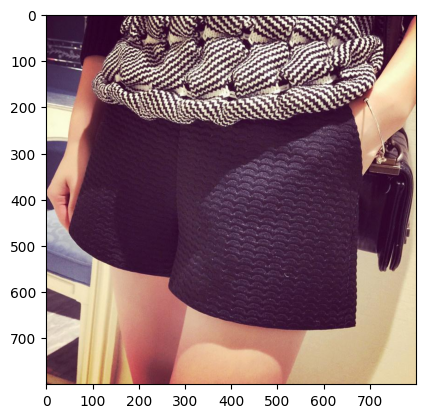

In [2]:
#Test if disk F: can be read
#If not please disconnect then reconnect Disk F:
img_id = "012284"

image = mpimg.imread(f"D:/Benji/deepfashion2_dataset/train/image/{img_id}.jpg")
plt.imshow(image)
plt.show()

In [3]:
# Initialize Directory
train_dir = "D:/Benji/deepfashion2_dataset_filter/train/pos/img"
train_label = "D:/Benji/deepfashion2_dataset_filter/train/pos/label"
val_dir = "D:/Benji/deepfashion2_dataset_filter/val/img"
val_label = "D:/Benji/deepfashion2_dataset_filter/val/label"
test_dir = "D:/Benji/deepfashion2_dataset_filter/test/"

In [4]:
ultralytics.checks()

Ultralytics YOLOv8.0.203  Python-3.11.3 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)
Setup complete  (12 CPUs, 31.9 GB RAM, 308.6/446.5 GB disk)


In [7]:
model = YOLO('yolov8n.pt')
results = model.train(data='D:/Benji/yaml/deepfashion2.yaml', epochs=100, batch=-1, patience=75, device=0, optimizer='Adam')

New https://pypi.org/project/ultralytics/8.0.209 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.203  Python-3.11.3 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/Benji/yaml/deepfashion2.yaml, epochs=100, patience=75, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fals

      5/100      5.68G      1.014      1.344      1.314          4        640: 100%|██████████| 3014/3014 [19:02<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 374/374 [03:
                   all      32153      32153      0.592      0.389      0.358      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      6/100      5.68G      1.002      1.324      1.304          6        640: 100%|██████████| 3014/3014 [19:04<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 374/374 [04:
                   all      32153      32153      0.591      0.395      0.362      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/100      5.68G     0.9927      1.303      1.297          6        640: 100%|██████████| 3014/3014 [19:03<00:00,
                 Class     Images  Instances      Box(P         

     25/100      5.68G     0.9515      1.224      1.272          5        640: 100%|██████████| 3014/3014 [18:54<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 374/374 [04:
                   all      32153      32153      0.601      0.403      0.387      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     26/100      5.77G     0.9496      1.225       1.27          3        640: 100%|██████████| 3014/3014 [18:55<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 374/374 [03:
                   all      32153      32153      0.602      0.405      0.387      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/100      5.68G     0.9469      1.219      1.268          3        640: 100%|██████████| 3014/3014 [18:57<00:00,
                 Class     Images  Instances      Box(P         

     45/100      5.68G     0.9201      1.168       1.25          2        640: 100%|██████████| 3014/3014 [18:57<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 374/374 [03:
                   all      32153      32153      0.601      0.423      0.399      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/100      5.68G     0.9184      1.165      1.248          2        640: 100%|██████████| 3014/3014 [18:58<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 374/374 [05:
                   all      32153      32153      0.602      0.423      0.401      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/100      5.68G     0.9181      1.166      1.248          3        640: 100%|██████████| 3014/3014 [18:58<00:00,
                 Class     Images  Instances      Box(P         

     65/100      5.68G     0.8847      1.106      1.225          2        640: 100%|██████████| 3014/3014 [18:56<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 374/374 [03:
                   all      32153      32153      0.591      0.447       0.42      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     66/100      5.68G      0.884      1.102      1.225          3        640: 100%|██████████| 3014/3014 [19:00<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 374/374 [05:
                   all      32153      32153      0.589      0.448      0.421      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     67/100      5.68G      0.881      1.098      1.221          5        640: 100%|██████████| 3014/3014 [18:59<00:00,
                 Class     Images  Instances      Box(P         

     85/100      5.68G     0.8363      1.018      1.192          5        640: 100%|██████████| 3014/3014 [18:56<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 374/374 [05:
                   all      32153      32153      0.583      0.462      0.438      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     86/100      5.68G     0.8323      1.012      1.187          5        640: 100%|██████████| 3014/3014 [18:55<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 374/374 [03:
                   all      32153      32153      0.581      0.467       0.44      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     87/100      5.68G     0.8291      1.009      1.187          5        640: 100%|██████████| 3014/3014 [18:57<00:00,
                 Class     Images  Instances      Box(P         

            vest dress      32153       2981      0.585      0.756      0.735      0.643
           sling dress      32153        722      0.325      0.497      0.317      0.266
Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\train2
